<a href="https://colab.research.google.com/github/mvuddandi/ML-StatModels/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mvuddandi/ML-StatModels.git

Cloning into 'ML-StatModels'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 63 (delta 27), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 581.08 KiB | 4.04 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
%cd ML-StatModels/

/content/ML-StatModels


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv("HR_comma_sep.csv")
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


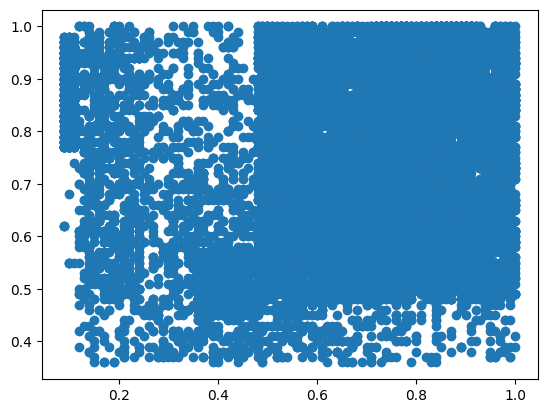

In [39]:
plt.scatter(df.satisfaction_level, df.last_evaluation)

plt.show()

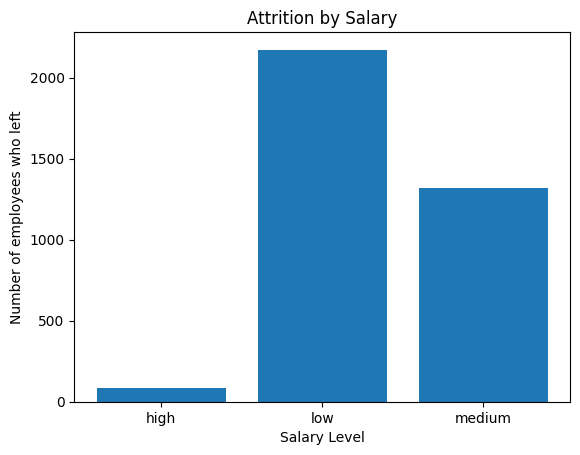

In [40]:

df_grouped = df.groupby('salary')['left'].sum()

plt.bar(df_grouped.index, df_grouped.values)
plt.xlabel("Salary Level")
plt.ylabel("Number of employees who left")
plt.title("Attrition by Salary")
plt.show()


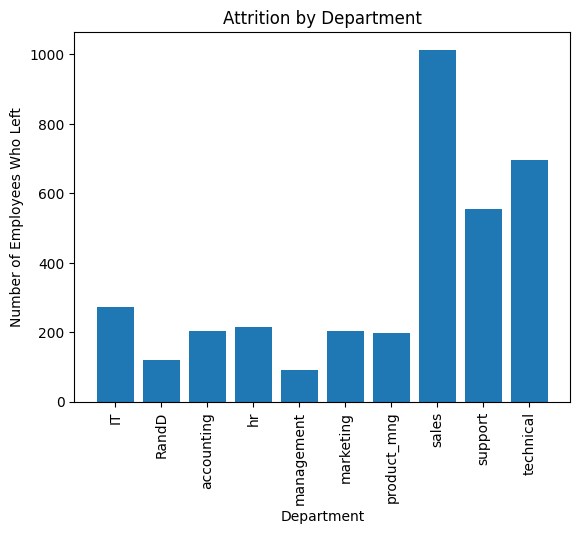

In [41]:
df_grouped_2 = df.groupby('sales')['left'].sum()

plt.bar(df_grouped_2.index, df_grouped_2.values)
plt.xlabel("Department")
plt.ylabel("Number of Employees Who Left")
plt.title("Attrition by Department")
plt.xticks(rotation=90)   # Rotate x-axis labels by 90 degrees
plt.show()


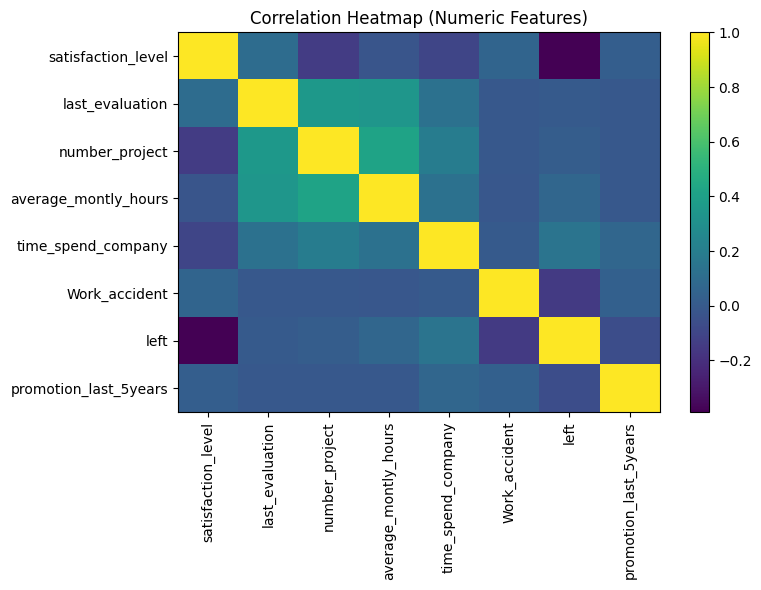

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('HR_comma_sep.csv')

# Correlation of numeric columns
corr = df.select_dtypes(include='number').corr()

# Plot
plt.figure(figsize=(8,6))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im)

# Axis labels
ticks = range(len(corr.columns))
plt.xticks(ticks, corr.columns, rotation=90)
plt.yticks(ticks, corr.columns)

plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


In [45]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
cat_cols = df[['sales', 'salary']]

# New correct encoder (for latest sklearn)
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit + transform
ohe_data = ohe.fit_transform(cat_cols)

# Convert to dataframe
ohe_df = pd.DataFrame(
    ohe_data,
    columns=ohe.get_feature_names_out(['sales', 'salary'])
)

# Merge
df_final = pd.concat([df.drop(['sales', 'salary'], axis=1), ohe_df], axis=1)

df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df_final.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [51]:
X_Train, X_Test, y_Train, y_Test =   train_test_split(df_final[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium']], df_final.left, train_size=0.8)

In [52]:
X_Test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
3033,0.49,0.95,4,181,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2315,0.78,0.76,5,168,4,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14435,0.40,0.56,2,149,3,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14083,0.97,0.94,4,253,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12242,0.38,0.53,2,156,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12878,0.79,0.87,3,194,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1640,0.91,0.89,5,217,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7678,0.98,0.79,4,231,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12627,0.41,0.46,2,156,3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [54]:
lr.fit(X_Train,y_Train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
lr.predict(X_Test)

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
# Accuracy (same as accuracy_score(y_Test, lr.predict(X_Test)))
acc = lr.score(X_Test, y_Test)
print("Accuracy:", acc)


Accuracy: 0.8033333333333333
